In [6]:
!pip install pystan

In [7]:
!pip install  prophet

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_excel('/content/Airlines+Data (1).xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [11]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [12]:
from prophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/4p40m5c9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/nec2ay9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91230', 'data', 'file=/tmp/tmpnrdglca3/4p40m5c9.json', 'init=/tmp/tmpnrdglca3/nec2ay9j.json', 'output', 'file=/tmp/tmpnrdglca3/prophet_modelfelc_x0_/prophet_model-20230810103813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [17]:
future_dates.tail()

,ds
456,2003-11-27
457,2003-11-28
458,2003-11-29
459,2003-11-30
460,2003-12-01


In [18]:
df.tail()

,ds,y
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [19]:
460-95

365

In [20]:
prediction=model.predict(future_dates)

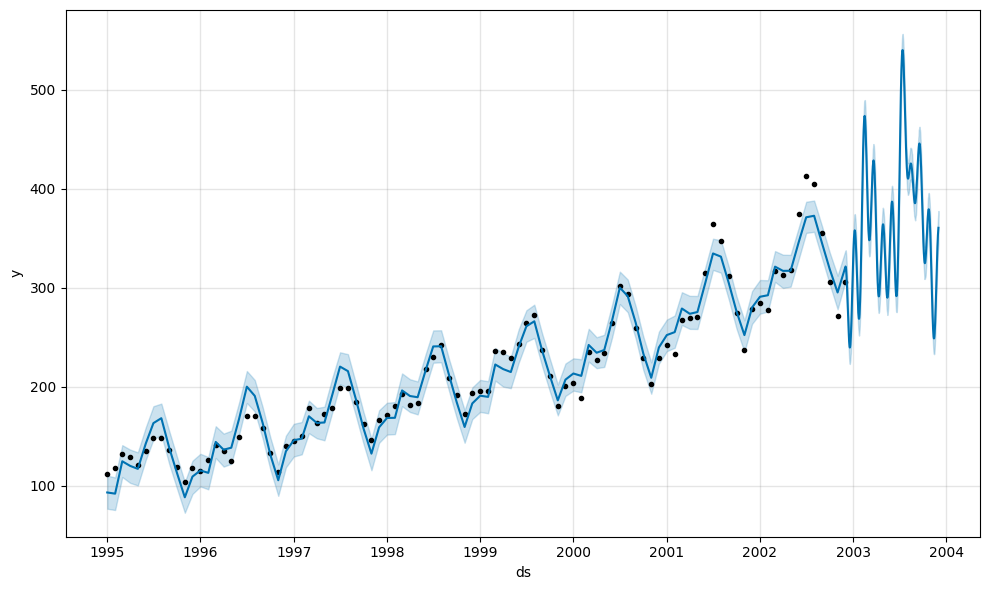

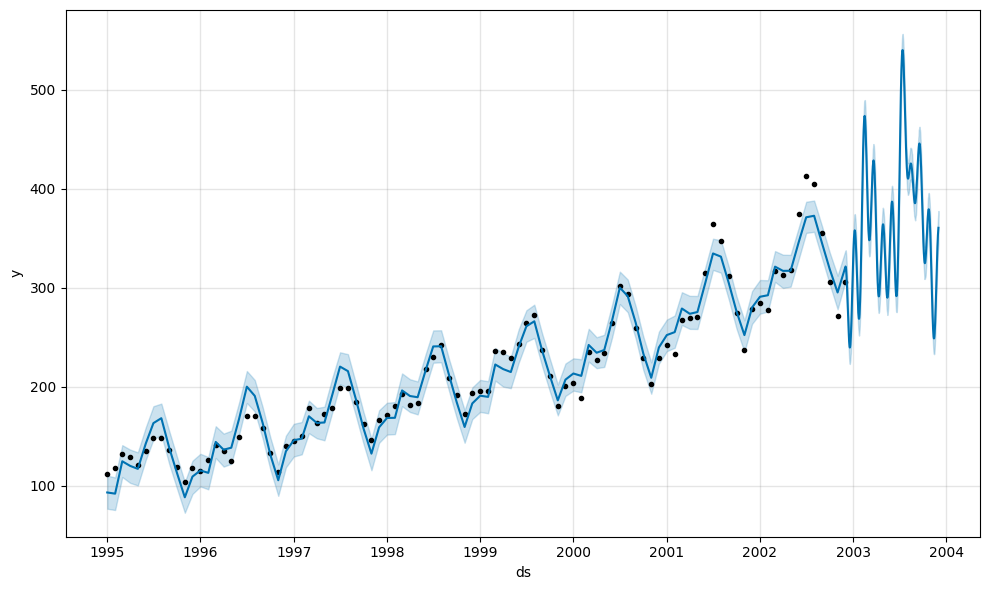

In [21]:
### plot the predicted projection
model.plot(prediction)

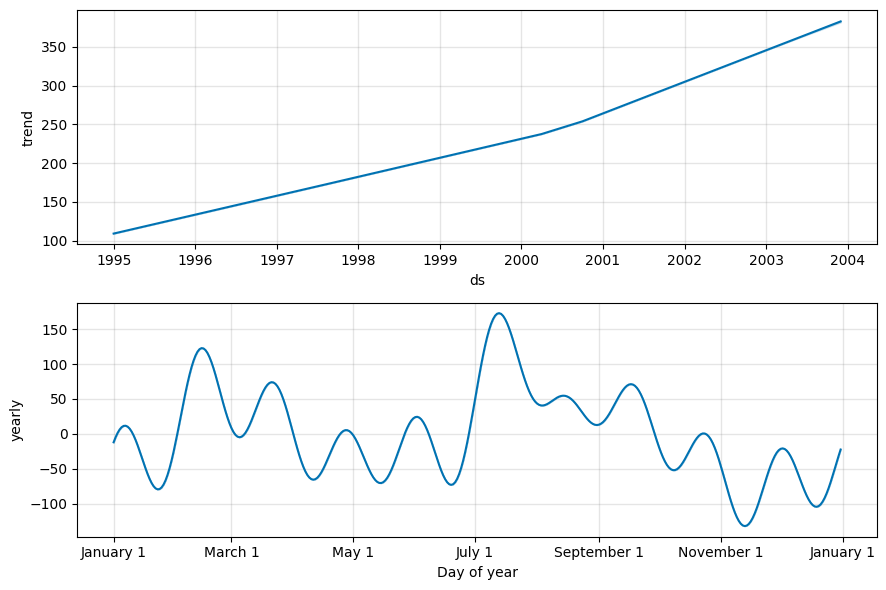

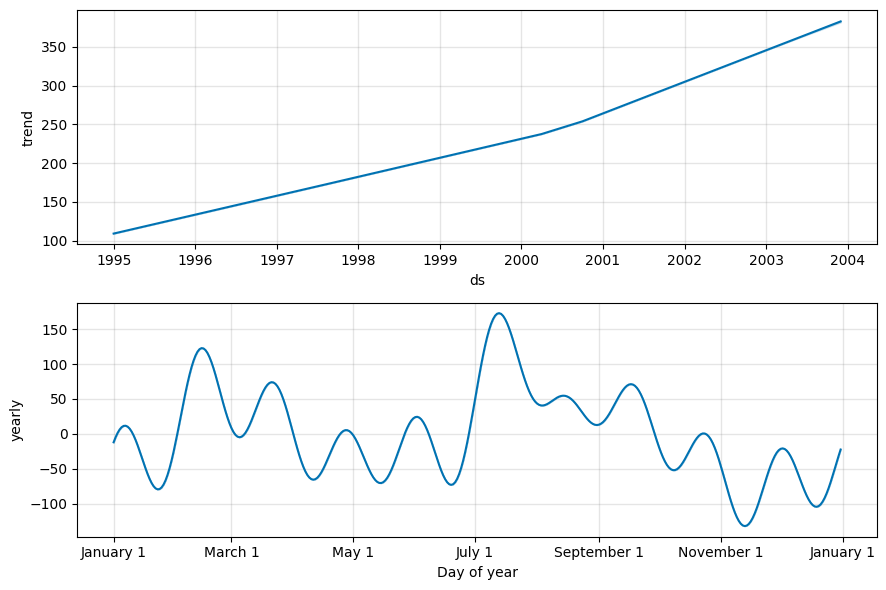

In [22]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [23]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 1997-06-25 00:00:00 and 2001-12-01 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/p4bp6ka0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/6wp617zm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31841', 'data', 'file=/tmp/tmpnrdglca3/p4bp6ka0.json', 'init=/tmp/tmpnrdglca3/6wp617zm.json', 'output', 'file=/tmp/tmpnrdglca3/prophet_modelshs2547z/prophet_model-20230810103817.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:38:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/546ollei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrdglca3/sccfm1mo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-07-01,199.602227,196.102803,203.017113,199,1997-06-25
1,1997-08-01,200.510919,196.915397,203.611955,199,1997-06-25
2,1997-09-01,189.510442,186.107701,192.718829,184,1997-06-25
3,1997-10-01,168.250621,164.764389,171.583440,162,1997-06-25
4,1997-11-01,151.658188,148.011653,155.056409,146,1997-06-25


In [24]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,407.564265,20.188221,12.028393,0.043509,0.019056,0.044660,0.500000
1,42 days,442.397669,21.033252,13.682702,0.050300,0.030736,0.051762,0.416667
2,46 days,454.524788,21.319587,14.418838,0.053818,0.039700,0.055133,0.416667
3,47 days,459.760362,21.442023,14.668227,0.054231,0.042180,0.055564,0.416667
4,51 days,621.550625,24.930917,18.091506,0.072496,0.054326,0.071781,0.333333


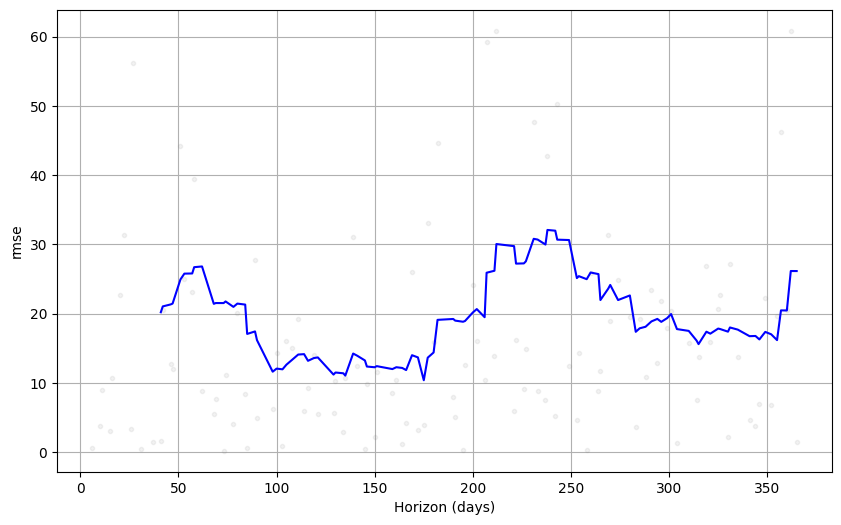

In [25]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')